## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [2]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [3]:
# Combine the data into a single dataset
combine_data_df = pd.merge(study_results,mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
combine_data_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [4]:
combine_data_df["Mouse ID"].count()

1893

In [5]:
# Checking the number of mice.
# mice_cnt = combine_data_df["Mouse ID"].nunique()

mice_cnt = len(combine_data_df["Mouse ID"].unique())
mice_cnt

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = combine_data_df.loc[combine_data_df.duplicated(\
               subset=['Mouse ID', 'Timepoint']),:]['Mouse ID']

dup_mouse_id

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_g989_df = combine_data_df.loc[combine_data_df['Mouse ID'] == "g989"] 
dup_g989_df['Mouse ID'].count()

13

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data_df.loc[combine_data_df['Mouse ID'] != "g989"] 
clean_df['Mouse ID'].count()

1880

In [9]:
# Checking the number of mice in the clean DataFrame.
mice_cnt = len(clean_df["Mouse ID"].unique())
mice_cnt

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

means = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stds = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stds,
                              "Tumor Volume Std. Err.":sems})
summary_stats_df.head(2)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_df.groupby("Drug Regimen").\
        agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

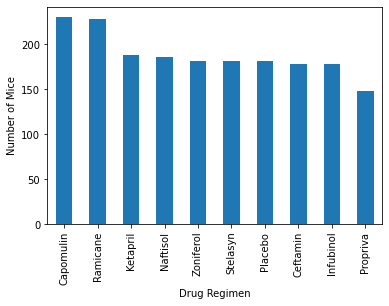

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using Pandas.

drug_counts = clean_df['Drug Regimen'].value_counts()
#value_counts.plot(kind="bar")
drug_counts.plot.bar()
plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()


In [13]:
from importlib import reload
matplotlib=reload(matplotlib)

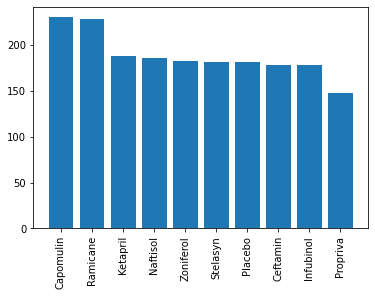

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested 
# for each drug regimen using pyplot.

drug_counts = clean_df['Drug Regimen'].value_counts()
#value_counts.plot(kind="bar")
plt.bar(drug_counts.index.values,drug_counts.values)
plt.xticks(rotation=90)
plt.show()

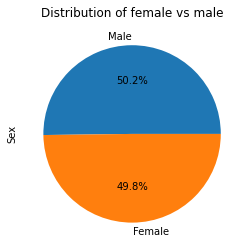

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_trips = combine_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
gender_chart= gender_trips.plot(kind="pie", y='Sex',autopct="%1.1f%%", title="Distribution of female vs male" )
gender_chart.set_xlablel=['Gender']
plt.show()


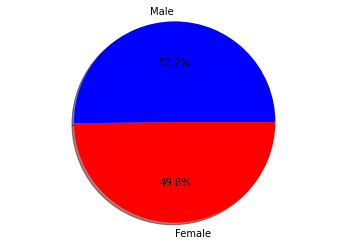

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_trips = combine_data_df.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
colors=['blue','red']
plt.pie(gender_trips.values,labels=gender_trips.index.values,colors=colors,autopct="%1.1f%%",shadow=True)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
combine_data = [clean_df['Drug Regimen'],clean_df['Tumor Volume (mm3)']]
combine_data

[0       Capomulin
 1        Ketapril
 2        Ketapril
 3        Ketapril
 4        Ketapril
           ...    
 1888    Capomulin
 1889    Capomulin
 1890     Ceftamin
 1891      Placebo
 1892     Stelasyn
 Name: Drug Regimen, Length: 1880, dtype: object,
 0       45.000000
 1       45.000000
 2       45.000000
 3       45.000000
 4       45.000000
           ...    
 1888    41.581521
 1889    31.023923
 1890    61.433892
 1891    58.634971
 1892    72.555239
 Name: Tumor Volume (mm3), Length: 1880, dtype: float64]

In [19]:
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"
combine_data_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


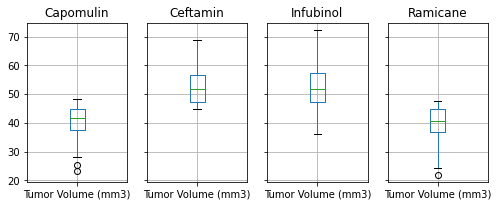

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_df=clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
combine_data = [clean_df['Drug Regimen'],clean_df['Tumor Volume (mm3)']]
data = pd.concat(combine_data,axis=1)
data=data.groupby('Drug Regimen')
boxplot=data.boxplot(layout=(3,4), figsize=(8,10))
plt.show()

In [52]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [74]:
# Put treatments into a list for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

newlist =['Capomulin','Ramicane','Infubinol','Ceftamin']
for x in range(10):
    innerlist = [Tumor_data]
    for y in range(10):
        innerlist.append(y)
    newlist.append(innerlist)
print(newlist)


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [[], 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


In [96]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset    
    # Determine outliers using upper and lower bounds
    
capomulin_merge=['Tumor Volume (mm3)']
s = pd.Series([1, 2, 3, 4])
s.quantile(.5)
s.quantile([.25, .5, .75])
lowerq = [0.25]
upperq = [0.75]
iqr = ('upperq-lowerq')

print(f"The lower quartile of Capomulin:{lowerq}")
print(f"The upper quartile of Capomulin:{upperq}")
print(f"The interquartile range of Capomulin:{iqr}")

print(f"Values below {lowerq} could be outliers.")
print(f"Values above {upperq} could be outliers.")

The lower quartile of Capomulin:[0.25]
The upper quartile of Capomulin:[0.75]
The interquartile range of Capomulin:upperq-lowerq
Values below [0.25] could be outliers.
Values above [0.75] could be outliers.


In [97]:
Ramicane_merge=['Tumor Volume (mm3)']
s = pd.Series([1, 2, 3, 4])
s.quantile(.5)
s.quantile([.25, .5, .75])
lowerq = [0.25]
upperq = [0.75]
iqr = ('upperq-lowerq')

print(f"The lower quartile of Ramicane:{lowerq}")
print(f"The upper quartile of Ramicane:{upperq}")
print(f"The interquartile range of Ramicane:{iqr}")

print(f"Values below {lowerq} could be outliers.")
print(f"Values above {upperq} could be outliers.")

The lower quartile of Ramicane:[0.25]
The upper quartile of Ramicane:[0.75]
The interquartile range of Ramicane:upperq-lowerq
Values below [0.25] could be outliers.
Values above [0.75] could be outliers.


In [98]:
Infubinol_merge=['Tumor Volume (mm3)']
s = pd.Series([1, 2, 3, 4])
s.quantile(.5)
s.quantile([.25, .5, .75])
lowerq = [0.25]
upperq = [0.75]
iqr = ('upperq-lowerq')

print(f"The lower quartile of Infubinol:{lowerq}")
print(f"The upper quartile of Infubinol:{upperq}")
print(f"The interquartile range of Infubinol:{iqr}")

print(f"Values below {lowerq} could be outliers.")
print(f"Values above {upperq} could be outliers.")

The lower quartile of Infubinol:[0.25]
The upper quartile of Infubinol:[0.75]
The interquartile range of Infubinol:upperq-lowerq
Values below [0.25] could be outliers.
Values above [0.75] could be outliers.


In [99]:
Ceftamin_merge=['Tumor Volume (mm3)']
s = pd.Series([1, 2, 3, 4])
s.quantile(.5)
s.quantile([.25, .5, .75])
lowerq = [0.25]
upperq = [0.75]
iqr = ('upperq-lowerq')

print(f"The lower quartile of Ceftamin:{lowerq}")
print(f"The upper quartile of Ceftamin:{upperq}")
print(f"The interquartile range of Ceftamin:{iqr}")

print(f"Values below {lowerq} could be outliers.")
print(f"Values above {upperq} could be outliers.")

The lower quartile of Ceftamin:[0.25]
The upper quartile of Ceftamin:[0.75]
The interquartile range of Ceftamin:upperq-lowerq
Values below [0.25] could be outliers.
Values above [0.75] could be outliers.


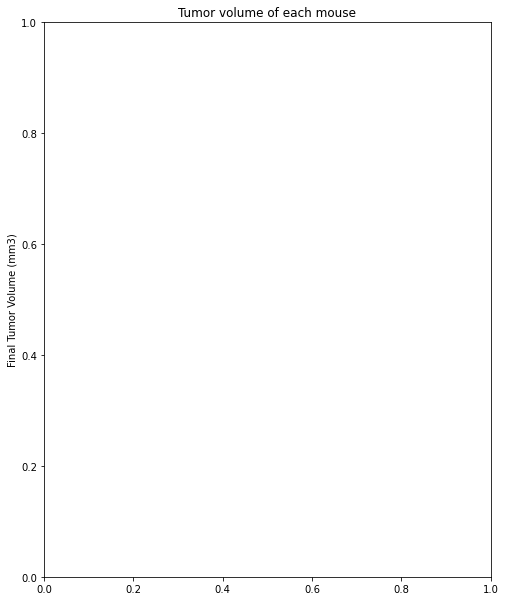

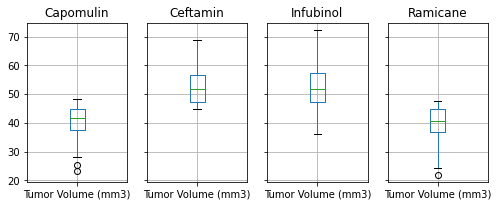

In [117]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
clean_df=clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
fig1, ax1 = plt.subplots(figsize=(8, 10))
ax1.set_title('Tumor volume of each mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
boxplot=data.boxplot(layout=(3,4), figsize=(8,10))


## Line and Scatter Plots

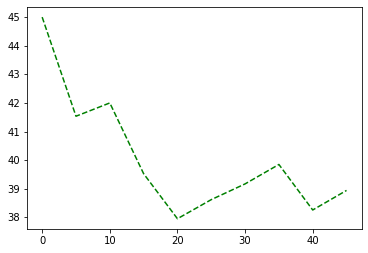

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
b742_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'b742']
plt.plot(b742_df['Timepoint'], b742_df['Tumor Volume (mm3)'], color='green', linestyle='dashed')

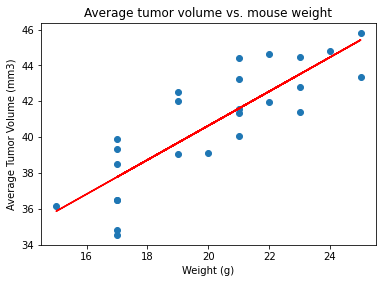

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average tumor volume vs. mouse weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


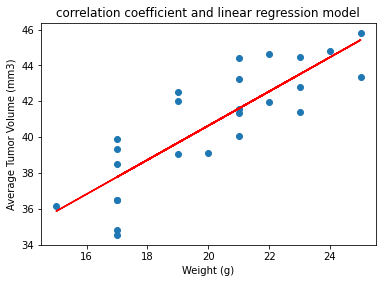

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
corr=round(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])

y_values = capomulin_average_df['Weight (g)']*model[0] + model[1]

plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('correlation coefficient and linear regression model')
plt.show()
